In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv("/content/cleaned_matches (1).csv")
deliveries = pd.read_csv("/content/cleaned_deliveries.csv")

In [3]:
df = matches[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']]
df.dropna(inplace=True)

/tmp/ipython-input-1540971952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [7]:
df = matches[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']].dropna().copy()
encoder = LabelEncoder()
for col in df.columns:
    df.loc[:, col] = encoder.fit_transform(df[col])

In [8]:
X = df.drop('winner', axis=1)
y = df['winner']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
print(y_train.head())
print(y_train.dtype)


6        3
575     19
821     17
1063     2
905     14
Name: winner, dtype: object
object


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [17]:
y_pred = dt.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4885844748858447
              precision    recall  f1-score   support

           0       0.57      0.74      0.65        27
           1       0.29      0.67      0.40         3
           2       0.62      0.71      0.67         7
           3       0.33      0.23      0.27        13
           4       0.71      0.83      0.77         6
           5       0.80      0.67      0.73         6
           6       0.39      0.33      0.36        21
           7       0.00      0.00      0.00         2
           8       0.65      0.54      0.59        28
           9       0.00      0.00      0.00         6
          10       0.38      0.55      0.45        20
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         5
          14       0.50      0.56      0.53        25
          15       0.00      0.00      0.00         3
          17       0.46      0.43      0.45        3

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


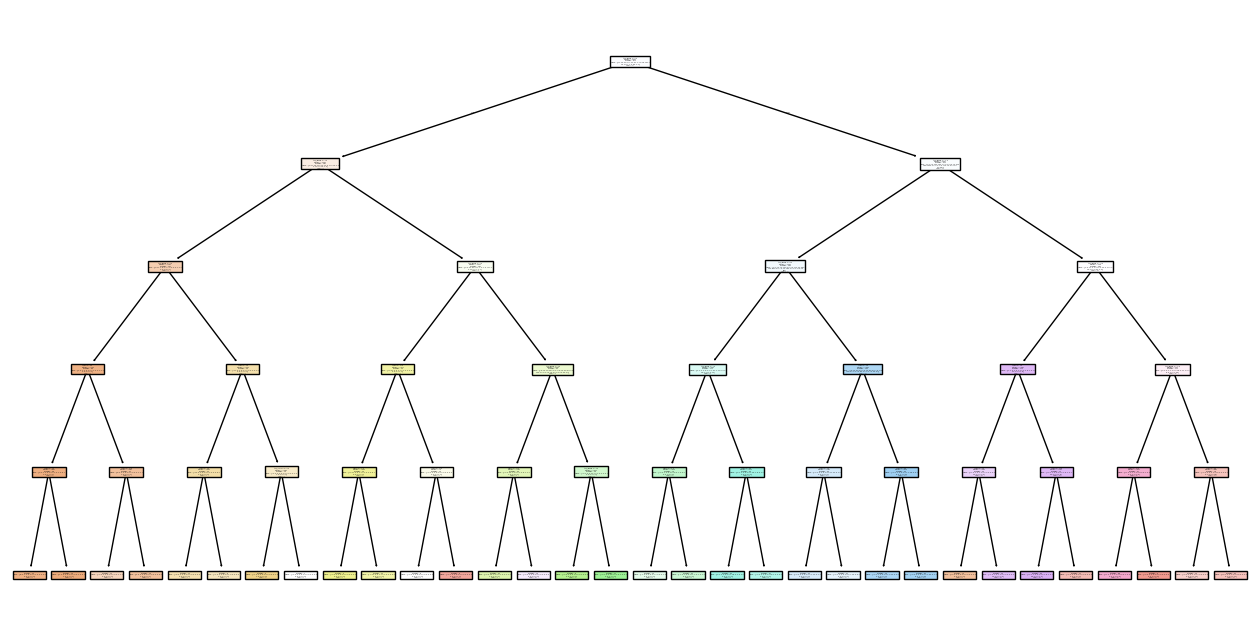

In [19]:
plt.figure(figsize=(16,8))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in set(y)], filled=True)
plt.show()